In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time
# 이미지 읽기
img = cv2.imread('./test_image/result.png', cv2.IMREAD_COLOR)
img2 = cv2.imread('./test_image/768px-Maple_Leaf.png')
cv2.imshow('original Image', img)
print(img.shape)
print(img.size)
cnt = 0
def img_show(image):   
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.show()

(225, 225, 3)
151875


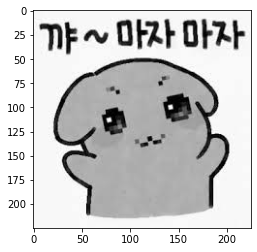

In [7]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# cv2.imshow('gray_image',img_gray)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
cv2.imwrite('./test_image/result_Gray.png', img_gray)
img_show(img_gray)


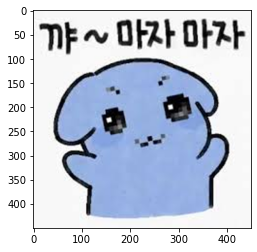

In [4]:
# cv2.resize(image, dsize, fx, fy, interpolation)  ; dsize = Manual Size, fx = 가로비율 ,fy = 세로비율, interpolation = 보간법(사이즈 변환시 픽셀사이 값 조절하는법)  보통 사이즈를 크게할땐 INTER_CUBIC, 작게할떈 INTER_AREA
img_expand = cv2.resize(img, None, fx = 2.0, fy = 2.0, interpolation = cv2.INTER_CUBIC)
# cv2.imshow('expand',img_expand)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
cv2.imwrite('./test_image/expand.png', img_expand)
img_show(img_expand)

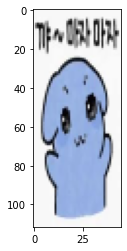

In [5]:
img_shrink = cv2.resize(img, None, fx = 0.2, fy = 0.5, interpolation = cv2.INTER_AREA)
# cv2.imshow('shrink', img_shrink)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
cv2.imwrite('./test_image/shrink.png', img_shrink)
img_show(img_shrink)



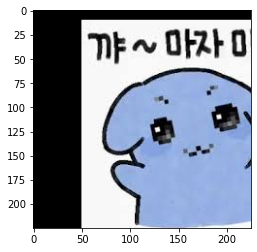

In [6]:
#cv2.warpAffine(image, M, dsize) 이미지 위치를 변경, M 변환행렬 - 이미지 참고, dsize = manual Size

height, width = img.shape[:2] #행과 열 정보만 가져오기
M = np.float32([[1, 0, 50], [0, 1, 10]]) #오른쪽으로 50만큼 아래로 10만큼 이동하는 변환행렬
img_move = cv2.warpAffine(img, M, (width, height))
# cv2.imshow('move', img_move)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
cv2.imwrite('./test_image/move.png', img_move)
img_show(img_move)

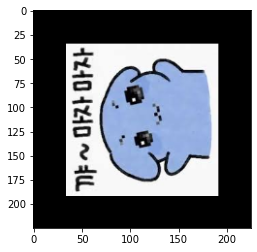

In [11]:
 #cv2.getRotationMatrix2D(center, angle, scale) 이미지 회전을 위한 변환 '행렬' 생성 center = 화전중심, angle = 회전각도, scale = scale factor
height, width = img.shape[:2] #행과 열 정보만 가져오기
M = cv2.getRotationMatrix2D((width/2, height/2), 90, 0.7) #scale값 이용해 0.5 크기줄임
img_rotate = cv2.warpAffine(img, M, (width,height))
img_show(img_rotate)

In [4]:
px = img[100,100]
print(px[2]) # 100,100의 R 픽셀

154


처리시간 :  0.00046896934509277344


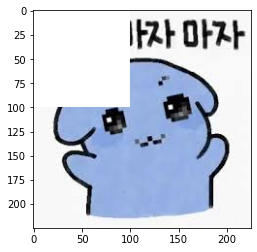

In [19]:
start_time = time.time()
testImg = img.copy()
testImg[0:100, 0:100] = [255, 255, 255] #for문보다 훨씬빠르다
print("처리시간 : ", time.time() - start_time)    
img_show(testImg)     

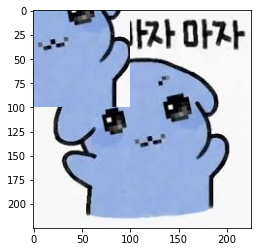

In [20]:
roi = img[100:200, 100:200]
testImg[0:100, 0:100] = roi
img_show(testImg)

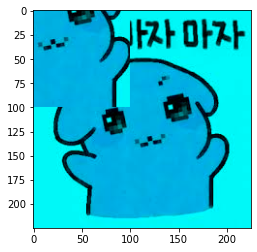

In [21]:
testImg[:, :, 2] = 0 #BGR중 R값을 0으로 둔다
img_show(testImg)

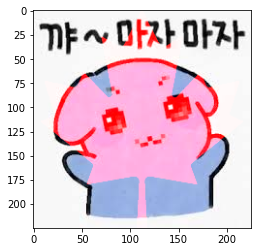

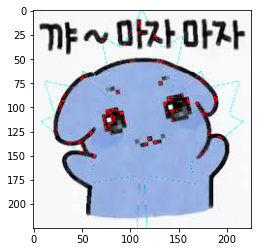

In [2]:
img2 = cv2.resize(img2, dsize = (225, 225), interpolation = cv2.INTER_AREA)
#img_show(img2)
img_add = cv2.add(img, img2) #cv2.add()는 255보다 크면 255로 표현한다.
#img_npAdd = np.add(img, img2)
img_testAdd = img + img2 # np.add랑 결과가 같다.
img_show(img_add)
#img_show(img_npAdd)
img_show(img_testAdd)

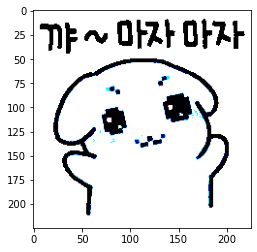

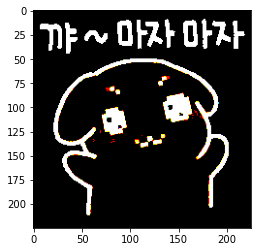

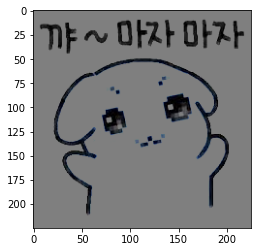

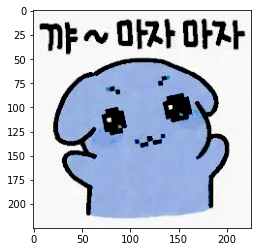

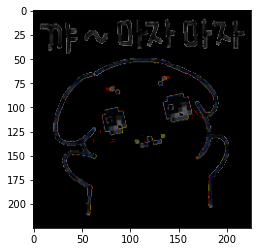

In [10]:
#cv2.threshold(image, thresh, max_value, type); #임계값 기준으로 흑/백 분류,  image: 처리할 gray scale image, thresh: 임계값, max_value:임계 값을 넘었을때 적용할 값, type: 임계점을 처리할 방식
#type - THRESH_BINARY : 입계값 보다 크면 max_value, 작으면 0, THRESH_BINARY_INV: 임계값보다 작으면 max_value, 크면 0, THRESH_TRUNC : 임계값보다 크면 입계값, 작으면 그대로, THRESH_TOZERO: 임계값 보다 크면 그대로, 작으면 0,
#THRESH_TOZERO_INV: 임계값 보다 크면 0, 작으면 그대로
image = []
ret, thres1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
image.append(thres1)
ret, thres1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)
image.append(thres1)
ret, thres1 = cv2.threshold(img, 127, 255, cv2.THRESH_TRUNC)
image.append(thres1)
ret, thres1 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO)
image.append(thres1)
ret, thres1 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO_INV)
image.append(thres1)
for i in range(len(image)):
    img_show(image[i])

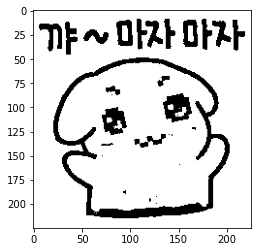

In [19]:
#cv2.adaptiveThreshold(image, max_value, adaptive_method, type, block_size, C) ; block_size = 임계값 영역크기, C = 평균이나 가중평균에서 차감할 값 / 전체이미지에 필터를 적용해 이미지 적용 / 임계점 직접 적용 x
imgGray = cv2.imread('./test_image/result.png', cv2.IMREAD_GRAYSCALE)
thres2 = cv2.adaptiveThreshold(imgGray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 21, 5)# ADAPTIVE_THRESH_MEAN_C : 모든 픽셀에 1/25 곱해서 임계값을 계산 (자동으로 임계점 생성)
#ADAPTIVE_THRESH_GAUSSIAN_C : 가우시안 필터 적용함( block * block)안에 있는 Gaussian 윈도우 기반의 가중치들의 합에서 C를 뺀 값을 입계점으로 설정
img_show(thres2)

119